In [33]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt

### Basic Feed Forward NN implemented in PyTorch

In [8]:
# Loading the data set
train_dataset = dsets.MNIST(root='../data', 
                            train=True, 
                            transform=transforms.ToTensor(),  
                            download=True)

test_dataset = dsets.MNIST(root='../data', 
                           train=False, 
                           transform=transforms.ToTensor())

In [10]:
# Hyper Parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [11]:
# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [12]:
# Checking the Data sets
type(train_dataset)

torchvision.datasets.mnist.MNIST

In [13]:
# Define NN Class
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [14]:
net = Net(input_size, hidden_size, num_classes)

### Xavier Initialization

In [17]:
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)

In [18]:
# Applying Xavier initialization to NN linear layers
net.apply(init_weights)

Net(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [19]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(net.parameters(),lr=learning_rate)

Training Normal model

In [20]:
# Train the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Convert torch tensor to Variable
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()  # zero the gradient buffer
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))

C:\Users\mohit_tare\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch [1/5], Step [100/600], Loss: 2.2305
Epoch [1/5], Step [200/600], Loss: 2.1397
Epoch [1/5], Step [300/600], Loss: 1.9992
Epoch [1/5], Step [400/600], Loss: 1.9301
Epoch [1/5], Step [500/600], Loss: 1.7940
Epoch [1/5], Step [600/600], Loss: 1.6935
Epoch [2/5], Step [100/600], Loss: 1.6665
Epoch [2/5], Step [200/600], Loss: 1.6699
Epoch [2/5], Step [300/600], Loss: 1.4866
Epoch [2/5], Step [400/600], Loss: 1.4670
Epoch [2/5], Step [500/600], Loss: 1.3839
Epoch [2/5], Step [600/600], Loss: 1.2842
Epoch [3/5], Step [100/600], Loss: 1.2701
Epoch [3/5], Step [200/600], Loss: 1.2752
Epoch [3/5], Step [300/600], Loss: 1.2899
Epoch [3/5], Step [400/600], Loss: 1.1843
Epoch [3/5], Step [500/600], Loss: 0.9797
Epoch [3/5], Step [600/600], Loss: 1.0439
Epoch [4/5], Step [100/600], Loss: 1.0243
Epoch [4/5], Step [200/600], Loss: 1.0578
Epoch [4/5], Step [300/600], Loss: 1.0300
Epoch [4/5], Step [400/600], Loss: 0.8943
Epoch [4/5], Step [500/600], Loss: 0.9182
Epoch [4/5], Step [600/600], Loss:

In [21]:
# Test the Model
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted.cpu() == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 84 %


In [31]:
# Test the Model
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    outputs = net_dp(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted.cpu() == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 10 %


### Initializing Dropout

In [37]:
# Initialize the Hyperparametrs
N_SAMPLES = 20
N_HIDDEN = 300
NUM_EPOCHS = 500

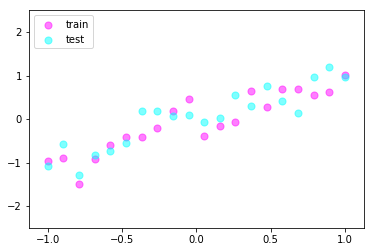

In [34]:
# training data
x = torch.unsqueeze(torch.linspace(-1, 1, N_SAMPLES), 1)
y = x + 0.3*torch.normal(torch.zeros(N_SAMPLES, 1), torch.ones(N_SAMPLES, 1))

# test data
test_x = torch.unsqueeze(torch.linspace(-1, 1, N_SAMPLES), 1)
test_y = test_x + 0.3*torch.normal(torch.zeros(N_SAMPLES, 1), torch.ones(N_SAMPLES, 1))

# show data
plt.scatter(x.data.numpy(), y.data.numpy(), c='magenta', s=50, alpha=0.5, label='train')
plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='cyan', s=50, alpha=0.5, label='test')
plt.legend(loc='upper left')
plt.ylim((-2.5, 2.5))
plt.show()

In [35]:
net_overfitting = torch.nn.Sequential(
    torch.nn.Linear(1, N_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, N_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, 1),
)

net_dropped = torch.nn.Sequential(
    torch.nn.Linear(1, N_HIDDEN),
    torch.nn.Dropout(0.5),  # drop 50% of the neuron
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, N_HIDDEN),
    torch.nn.Dropout(0.5),  # drop 50% of the neuron
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, 1),
)

print(net_overfitting)  # net architecture
print(net_dropped)

Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): ReLU()
  (2): Linear(in_features=300, out_features=300, bias=True)
  (3): ReLU()
  (4): Linear(in_features=300, out_features=1, bias=True)
)
Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): Dropout(p=0.5)
  (2): ReLU()
  (3): Linear(in_features=300, out_features=300, bias=True)
  (4): Dropout(p=0.5)
  (5): ReLU()
  (6): Linear(in_features=300, out_features=1, bias=True)
)


In [ ]:
# Define the optimizers and cost function
optimizer_ofit = torch.optim.Adam(net_overfitting.parameters(), lr=0.01)
optimizer_drop = torch.optim.Adam(net_dropped.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()

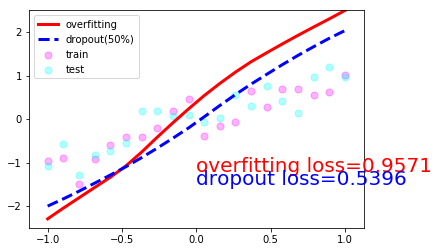

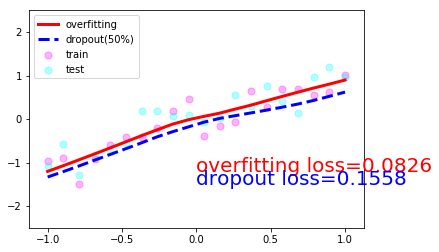

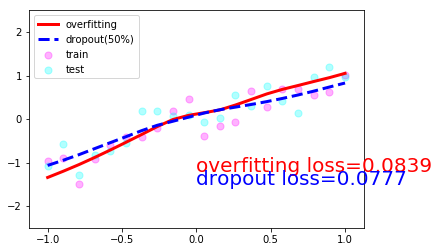

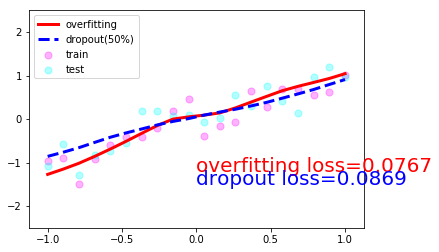

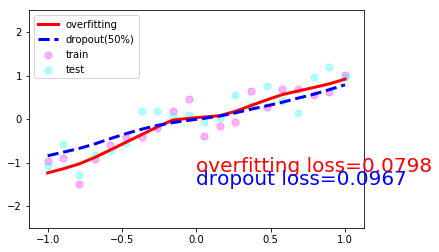

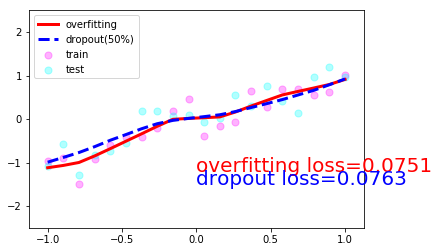

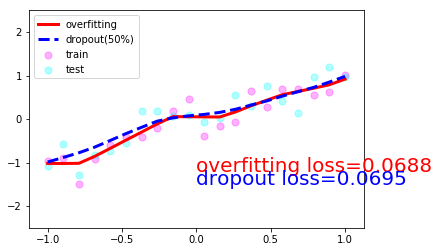

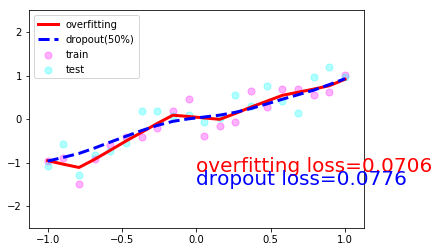

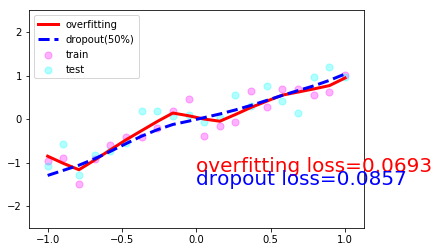

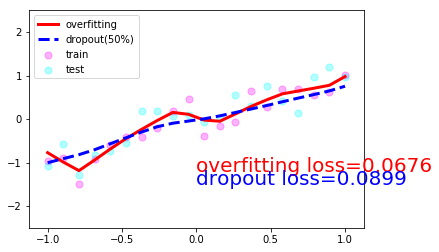

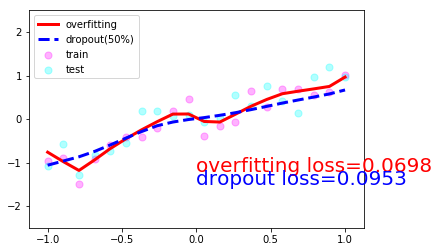

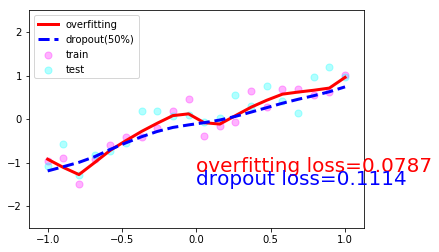

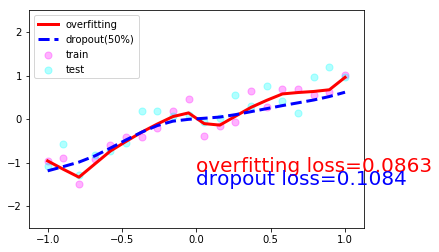

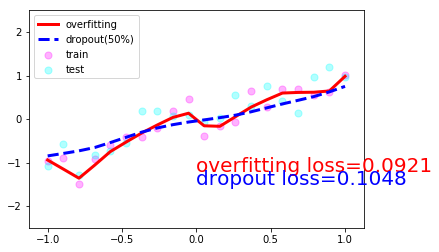

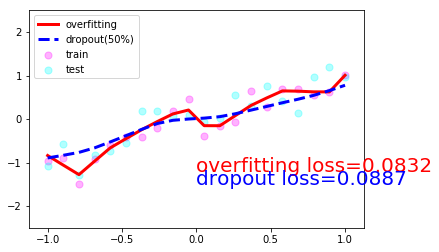

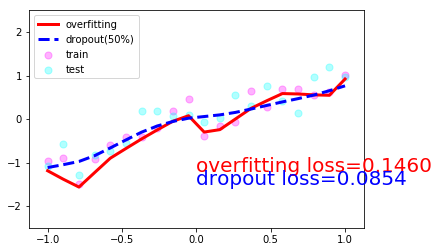

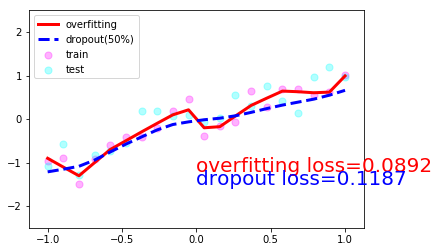

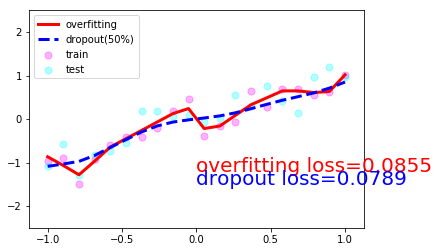

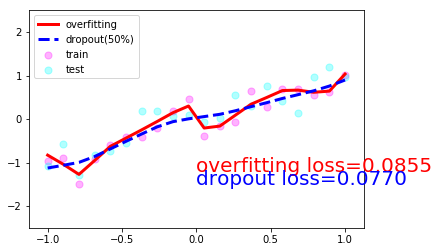

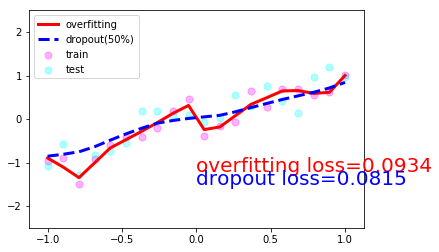

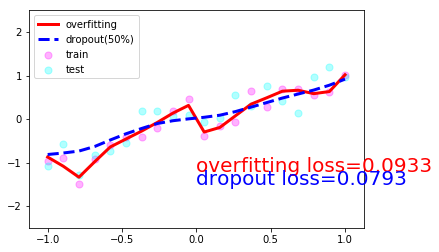

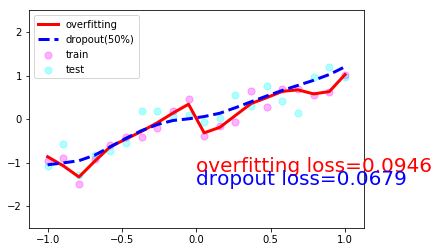

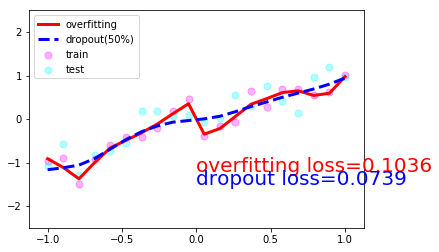

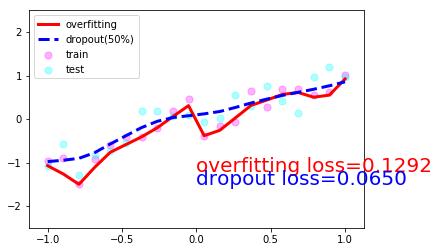

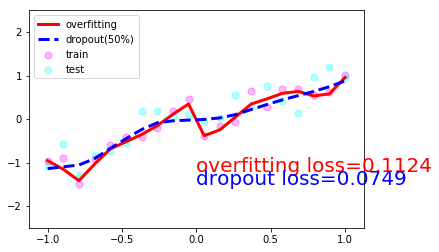

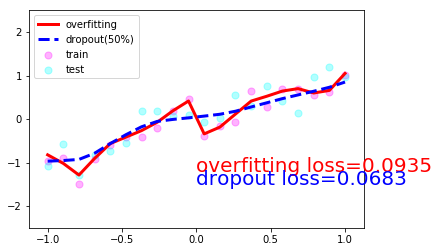

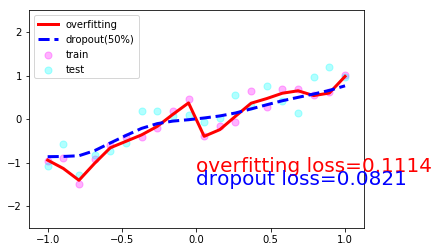

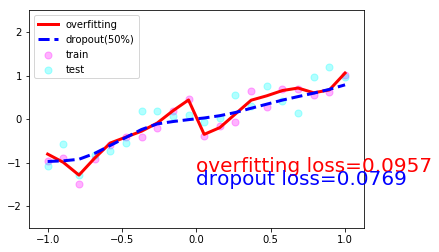

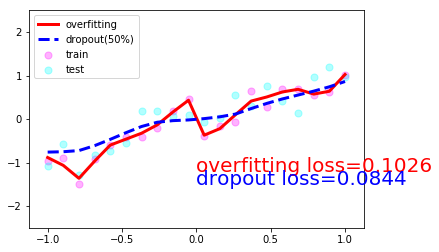

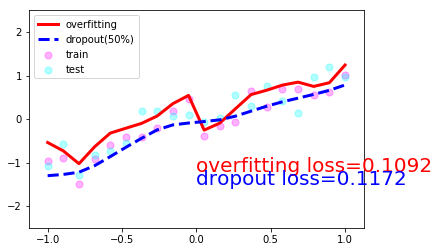

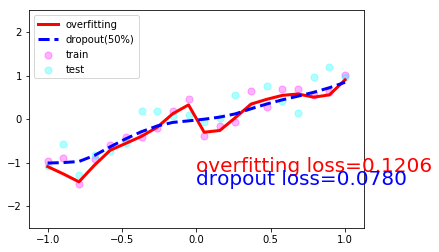

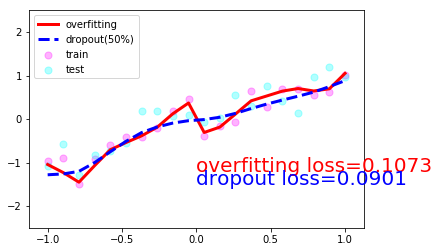

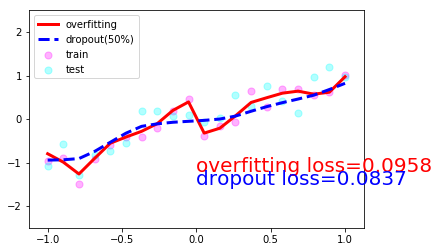

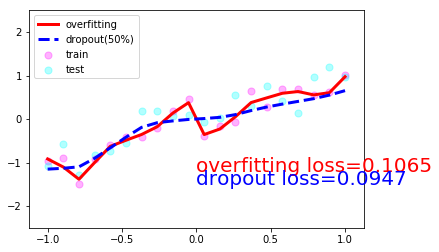

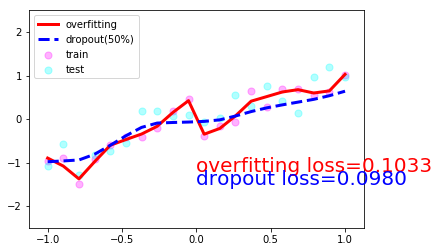

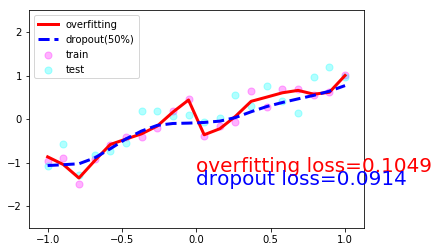

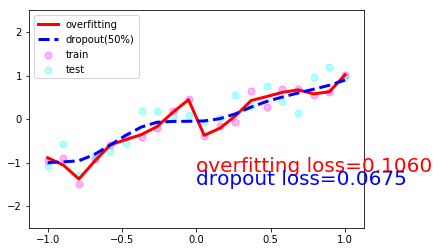

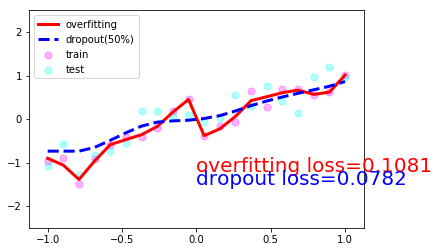

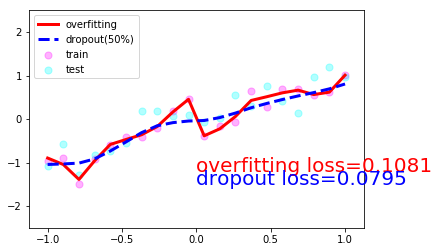

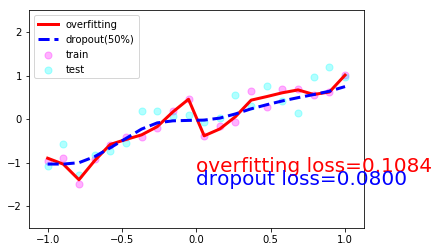

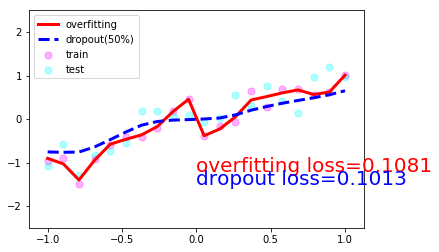

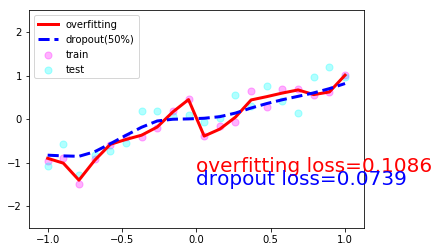

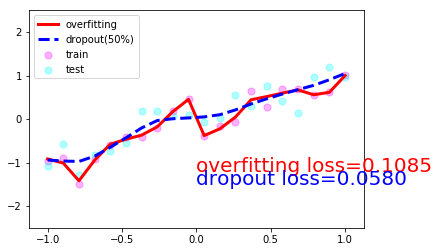

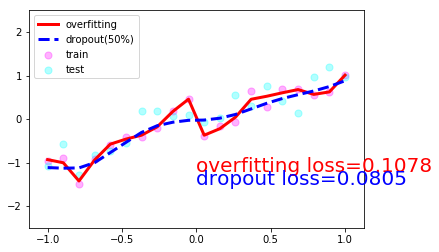

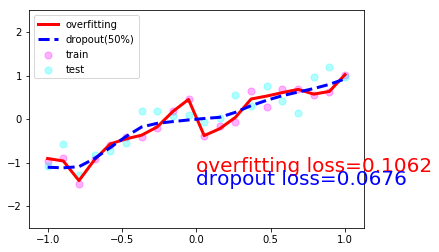

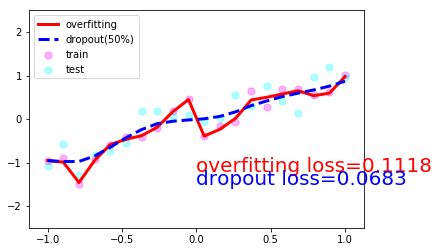

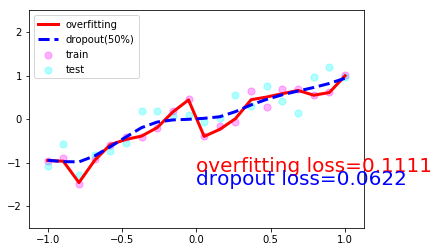

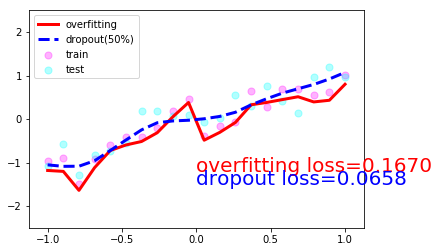

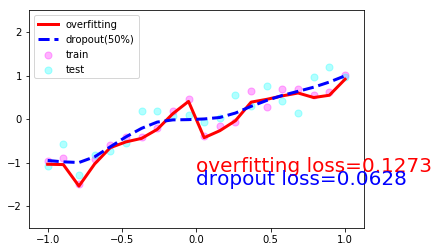

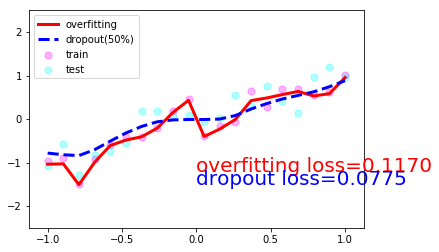

In [36]:
plt.ion()   # something about plotting

for t in range(NUM_EPOCHS):
    pred_ofit = net_overfitting(x)
    pred_drop = net_dropped(x)
    loss_ofit = loss_func(pred_ofit, y)
    loss_drop = loss_func(pred_drop, y)

    optimizer_ofit.zero_grad()
    optimizer_drop.zero_grad()
    loss_ofit.backward()
    loss_drop.backward()
    optimizer_ofit.step()
    optimizer_drop.step()

    if t % 10 == 0:
        # change to eval mode in order to fix drop out effect
        net_overfitting.eval()
        net_dropped.eval()  # parameters for dropout differ from train mode

        # plotting
        plt.cla()
        test_pred_ofit = net_overfitting(test_x)
        test_pred_drop = net_dropped(test_x)
        plt.scatter(x.data.numpy(), y.data.numpy(), c='magenta', s=50, alpha=0.3, label='train')
        plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='cyan', s=50, alpha=0.3, label='test')
        plt.plot(test_x.data.numpy(), test_pred_ofit.data.numpy(), 'r-', lw=3, label='overfitting')
        plt.plot(test_x.data.numpy(), test_pred_drop.data.numpy(), 'b--', lw=3, label='dropout(50%)')
        plt.text(0, -1.2, 'overfitting loss=%.4f' % loss_func(test_pred_ofit, test_y).data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.text(0, -1.5, 'dropout loss=%.4f' % loss_func(test_pred_drop, test_y).data.numpy(), fontdict={'size': 20, 'color': 'blue'})
        plt.legend(loc='upper left'); plt.ylim((-2.5, 2.5));plt.pause(0.1)

        # change back to train mode
        net_overfitting.train()
        net_dropped.train()

plt.ioff()
plt.show()